## About This Notebook  

This notebook shows how I explored user behavior on an online shopping website using simple data analysis and visual storytelling. The goal of this project is to understand **where users drop off** in the shopping funnel—from viewing pages to adding items and finally making a purchase.  

Everything in this notebook is written in **clear and easy language** so anyone can follow each step and learn how to analyze user activity data from start to finish.  

---
<a id="project-introduction"></a>
# Project Introduction  

This project is about finding **why users do not complete their purchases** after browsing products on an e-commerce platform. Using this data, we try to understand **what stops users from buying**—for example, their time on page, device type, country, referral source, or number of items in the cart.  
By the end of this notebook, we will have a clear idea of how to track and visualize **funnel drops** and how businesses can improve their conversion rate.

---

## Project Title  

**Funnel Drop Analysis—Understanding User Journey in Online Shopping**

---

## Contents  

1. [Project Introduction](#project-introduction)  
2. [Objective](#objective)  
3. [Key Tasks](#key-tasks)  
4. [Tools Used](#tools-used)  
5. [Exploring the Dataset](#exploring-the-dataset)  
6. [Data Cleaning](#data-cleaning)  
7. [Charts and Visual Analysis](#charts-and-visual-analysis)  
8. [User Behavior Patterns](#user-behavior-patterns)  
9. [Funnel Drop Detection](#funnel-drop-detection)  
10. [Insights and Suggestions](#insights-and-suggestions)  
11. [Summary and Conclusion](#summary-and-conclusion)  
12. [What I Learned](#what-i-learned)

---

<a id="objective"></a>
## Objective  

Many users visit an online store but never complete their purchase. The goal of this project is to **analyze user activity** and **find where and why they drop out** of the funnel. By identifying these points, we can help improve website performance and increase sales conversions.  

---

<a id="key-tasks"></a>
## Key Tasks  

1. Read and understand the dataset (CSV file).  
2. Clean and prepare the data for analysis.  
3. Create charts to visualize user behavior patterns.  
4. Identify points where most users drop off.  
5. Find relationships between time on page, country, and purchase rate.  
6. Share final insights and suggestions for improvement.  

---
<a id="exploring-the-dataset"></a>
## Dataset Summary  

The dataset used in this project contains **12,719 user sessions** and **10 columns**. Each row represents one user visit on the website.  

Below is a short summary of the main columns: 

| Column Name | Description |
|--------------|-------------|
| **SessionID** | Unique ID for each visit |
| **UserID** | ID of the person visiting |
| **Timestamp** | Date and time of the visit |
| **PageType** | Type of page visited (Home, Product, Cart, etc.) |
| **DeviceType** | Device used (Mobile, Desktop, Tablet) |
| **Country** | Country of the visitor |
| **ReferralSource** | How they reached the site (Direct, Ads, Social, etc.) |
| **TimeOnPage_seconds** | Time user spent on that page |
| **ItemsInCart** | Number of items added to the cart |
| **Purchased** | 1 = user purchased, 0 = did not purchase |

The dataset combines both **behavioral features** (like time on page and items in cart) and **categorical details** (like device, country, and referral source). This mix helps us clearly understand how users behave at each stage of their journey.

---

<a id="tools-used"></a>
## Tools Used  

- **Python Libraries** → Pandas, NumPy, Matplotlib, Seaborn  
- **Environment** → Jupyter Notebook  

Now, let’s start by loading our dataset and exploring what kind of information it contains.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('funnel-drop-data.csv')
print("Data loaded successfully!")
print(df.shape)
print(df.columns.tolist())

Data loaded successfully!
(12719, 10)
['SessionID', 'UserID', 'Timestamp', 'PageType', 'DeviceType', 'Country', 'ReferralSource', 'TimeOnPage_seconds', 'ItemsInCart', 'Purchased']


## Import Libraries & Load the Data  

Before doing any kind of analysis, we must first bring in the tools (called **libraries**) that help us handle and understand our data. These tools let us read files, work with numbers, and create simple and colorful charts.  

---

### Code Used & Meaning  

- `import pandas as pd` → helps us read and manage data easily like Excel sheets.  
- `import numpy as np` → used for number calculations and arrays.  
- `import seaborn as sns` → used to make beautiful and easy-to-read charts.  
- `import matplotlib.pyplot as plt` → another library to make graphs and plots.  

Together, these imports give us all the tools to explore and visualize our dataset smoothly.  

---

### Reading the CSV File  

Now we load our dataset named **funnel-drop-data.csv** using pandas.  

- `df = pd.read_csv('funnel-drop-data.csv')` → reads the CSV file and keeps it in a table-like structure called **DataFrame**.  
- `print("Data loaded successfully!")` → confirms the file was read correctly.  
- `df.shape` → shows how many **rows** and **columns** are in the dataset.  
- `df.columns.tolist()` → lists the names of all columns.  

When we run the code, we see output like this: 

Data loaded successfully!  
(12719, 10)  
['SessionID', 'UserID', 'Timestamp', 'PageType', 'DeviceType', 'Country', 'ReferralSource', 'TimeOnPage_seconds', 'ItemsInCart', 'Purchased']  

---

### What This Means  

- **12719 rows** → there are 12,719 user sessions (each row = one visit).  
- **10 columns** → each session has 10 types of information.  

Each column tells us something about the user’s journey: 

| Column Name | Meaning |
|--------------|----------|
| **SessionID** | Unique number for each visit |
| **UserID** | ID of the person visiting |
| **Timestamp** | Date & time of the visit |
| **PageType** | Page type (Home, Product, Cart, etc.) |
| **DeviceType** | Device used – Mobile, Desktop, or Tablet |
| **Country** | Country from which the user visited |
| **ReferralSource** | How the user came (Google, Ads, Social, etc.) |
| **TimeOnPage_seconds** | Time the user spent on the page |
| **ItemsInCart** | Number of items added to cart |
| **Purchased** | 1 = bought, 0 = did not buy |

---

### What We Learned  

- The file was loaded correctly, and the data is ready.  
- We understand what each column means.  
- Each row tells the story of one person visiting the site—how they arrived, what they saw, and whether they made a purchase.  

This step gives us a **clear base** to start analyzing user behavior and funnel drop patterns.

In [3]:
print("Shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())

Shape: (12719, 10)

Columns:
 ['SessionID', 'UserID', 'Timestamp', 'PageType', 'DeviceType', 'Country', 'ReferralSource', 'TimeOnPage_seconds', 'ItemsInCart', 'Purchased']


In [4]:
# Missing values and data types
print("\nNull values per column:\n", df.isnull().sum())


Null values per column:
 SessionID             0
UserID                0
Timestamp             0
PageType              0
DeviceType            0
Country               0
ReferralSource        0
TimeOnPage_seconds    0
ItemsInCart           0
Purchased             0
dtype: int64


<a id="data-cleaning"></a>
## Checking for Missing Values  

Before doing any kind of analysis, we must make sure our data is **complete** — meaning there are no empty or missing cells. Missing values can cause wrong results when we make graphs or build models, so this step is very important.

---

In [5]:
# Data types summary
print("\nData types:\n", df.dtypes)


Data types:
 SessionID             object
UserID                object
Timestamp             object
PageType              object
DeviceType            object
Country               object
ReferralSource        object
TimeOnPage_seconds     int64
ItemsInCart            int64
Purchased              int64
dtype: object


## Checking Data Types  

After making sure there are no missing values, the next important step is to check the **data types** of each column. This helps us understand what kind of information each column holds — numbers, text, or time. Knowing data types also helps us decide what kind of operations or visualizations we can perform later.

In [6]:
# Basic numeric summary
df.describe()

,TimeOnPage_seconds,ItemsInCart,Purchased
count,12719.000000,12719.000000,12719.000000
mean,97.427707,1.138533,0.397044
std,48.120729,1.689954,0.489304
min,15.000000,0.000000,0.000000
25%,56.000000,0.000000,0.000000
50%,98.000000,0.000000,0.000000
75%,139.000000,2.000000,1.000000
max,180.000000,5.000000,1.000000


## Understanding Basic Numeric Summary  

Now that we’ve checked for missing values and data types, it’s time to look at a **quick summary of the numerical columns** in our dataset. This helps us understand the overall pattern of user behavior — like how long people stay on pages, how many items they add to the cart, and how often they make a purchase.

---

In [7]:
# Exploring from Timestamp ---

print("Original Timestamp dtype:", df['Timestamp'].dtype)

# Convert Timestamp column to datetime objects
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extract new time-based features
df['HourOfDay'] = df['Timestamp'].dt.hour
df['DayOfWeek'] = df['Timestamp'].dt.day_name()
df['Date'] = df['Timestamp'].dt.date
df['Month'] = df['Timestamp'].dt.month
df['Month_Name'] = df['Timestamp'].dt.month_name() 

print("New time-based features created.")
df[['Timestamp', 'HourOfDay', 'DayOfWeek', 'Date', 'Month_Name']].head()

Original Timestamp dtype: object
New time-based features created.


,Timestamp,HourOfDay,DayOfWeek,Date,Month_Name
0,2025-01-20 22:53:34,22,Monday,2025-01-20,January
1,2025-02-26 12:57:10,12,Wednesday,2025-02-26,February
2,2025-02-26 12:59:11,12,Wednesday,2025-02-26,February
3,2025-06-24 15:40:46,15,Tuesday,2025-06-24,June
4,2025-06-11 07:21:02,7,Wednesday,2025-06-11,June


### Working with Timestamp

In this part, I converted the Timestamp column into a proper datetime format because it was in object type earlier. After that, I created a few new columns like hour, weekday, date, and month from it. These new columns will help me to check when most activities happen — like which day or hour users are more active.

---

**What this code does**
- Converts the original Timestamp into datetime type.
- Creates new columns: HourOfDay, DayOfWeek, Date, Month, and Month_Name.
- Makes the dataset ready for time-based trend analysis.

---

**What I found**
After creating these features, I can now look at user actions by time of day or by weekday. It also becomes easier to make charts later, such as user activity by hour or by month.

---

**Key point**
This step cleans the timestamp and adds useful time features that will help in the next analysis steps.

In [8]:
# Checking the date range
print(f"Number of unique dates: {df['Date'].nunique()}")
print(f"Data starts on: {df['Date'].min()}")
print(f"Data ends on: {df['Date'].max()}")

Number of unique dates: 243
Data starts on: 2025-01-01
Data ends on: 2025-08-31


### Checking the Date Range

Before going deeper, I wanted to see how many unique dates are present in the dataset and what time period it covers. This helps to understand if the data is continuous or if there are any missing months or gaps.

---

**What this code does**
- Counts the total number of unique dates in the dataset.  
- Finds the earliest and latest date values to know the overall time range.

---

**What I found**
The data starts from January 1, 2025, and ends on August 31, 2025. That means the dataset covers around eight months of activity, which is good enough to see clear patterns over time.

---

**Key point**
This step gives a quick idea of the time span of the dataset and confirms that we have sufficient data for trend analysis.

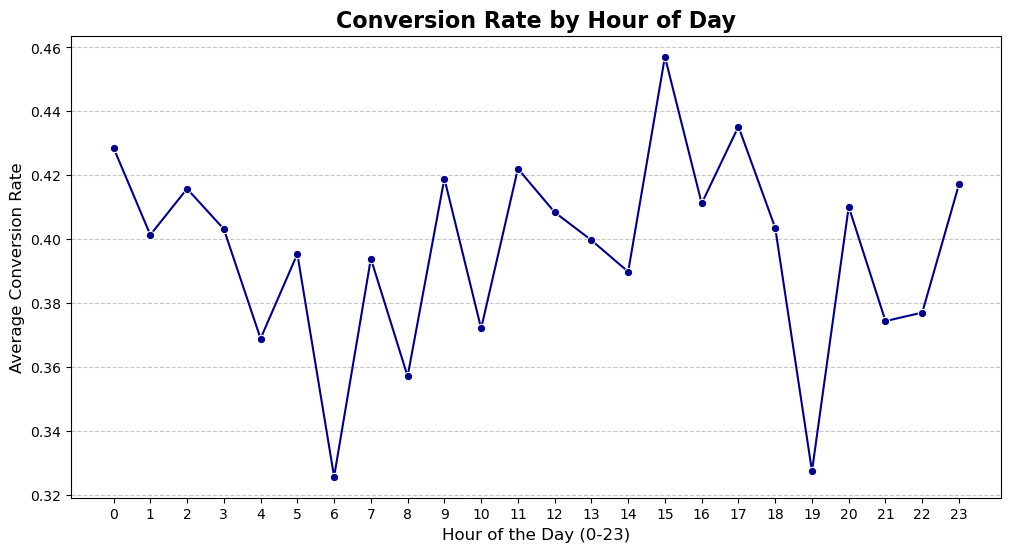

In [9]:
# Conversion Rate by Hour of Day
hourly_conv = df.groupby('HourOfDay')['Purchased'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_conv, x='HourOfDay', y='Purchased', marker='o', color='darkblue')
plt.title('Conversion Rate by Hour of Day', fontsize=16, weight='bold')
plt.xlabel('Hour of the Day (0-23)', fontsize=12)
plt.ylabel('Average Conversion Rate', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<a id="charts-and-visual-analysis"></a>
### Conversion Rate by Hour of Day

In this part, I checked how the conversion rate changes during different hours of the day. The idea was to find out if users are more likely to complete a purchase at certain times, like morning, afternoon, or night.

---

**What this code does**
- Groups the data by each hour of the day (0 to 23).
- Calculates the average conversion rate for each hour.
- Plots a line chart showing how the rate moves through the day.

---

**What I found**
The conversion rate is not the same throughout the day. It goes up and down quite a bit, with a few noticeable peaks around midday and early evening. There are also some hours, especially early morning and late night, where the conversion rate is much lower.

---

**Key point**
This chart helps to see when users are most active or ready to purchase. It can be useful for planning campaigns or showing offers at the right time of the day.

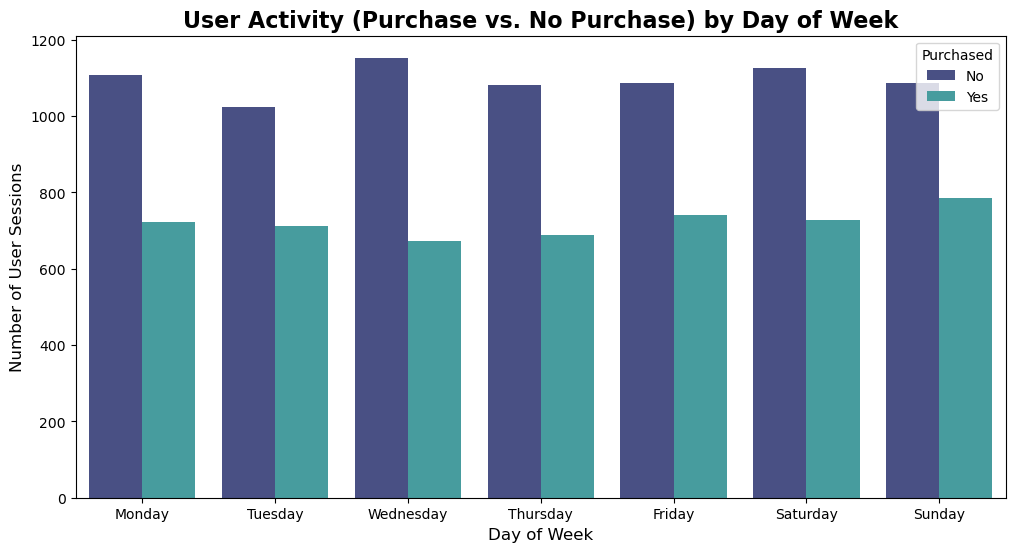

In [10]:
# --- Analysis: Purchases vs. Day of Week ---
plt.figure(figsize=(12, 6))
# We specify the order to ensure it's not alphabetical
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

sns.countplot(data=df, x='DayOfWeek', hue='Purchased', order=day_order, palette='mako')
plt.title('User Activity (Purchase vs. No Purchase) by Day of Week', fontsize=16, weight='bold')
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Number of User Sessions', fontsize=12)
plt.legend(title='Purchased', labels=['No', 'Yes'])
plt.show()

### User Activity by Day of Week

Here I wanted to see how user activity changes on different days of the week. The goal was to understand whether people are more likely to make a purchase on weekdays or weekends.

---

**What this code does**
- Groups the data by the day of the week.  
- Splits the bars by whether the user made a purchase or not.  
- Shows how many sessions happened each day with and without purchases.

---

**What I found**
User activity stays fairly steady through the week, but Wednesday and Saturday seem to have slightly higher numbers. Purchase counts are lower than non-purchases on all days, but the gap varies. It looks like users are a bit more active in the middle and at the end of the week.

---

**Key point**
This chart gives a quick idea of how the day of the week affects activity and purchases. It helps to plan campaigns or offers on days when engagement is naturally higher.

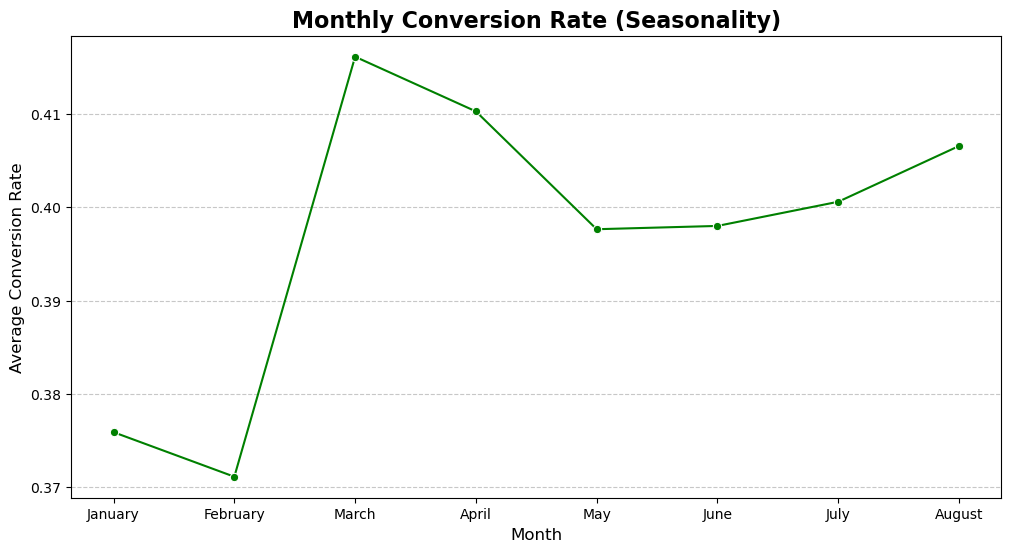

In [11]:
# Conversion Rate by Month ---
monthly_conv = df.groupby('Month_Name')['Purchased'].mean().reset_index()

# Sort by month number to ensure correct order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August']
monthly_conv['Month_Name'] = pd.Categorical(monthly_conv['Month_Name'], categories=month_order, ordered=True)
monthly_conv = monthly_conv.sort_values('Month_Name')

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_conv, x='Month_Name', y='Purchased', marker='o', color='green')
plt.title('Monthly Conversion Rate (Seasonality)', fontsize=16, weight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Conversion Rate', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Monthly Conversion Rate (Seasonality)

Here I checked how the average conversion rate changes month by month. The goal was to see if there is any seasonal trend where conversions are higher or lower in specific months.

---

**What this code does**
- Groups the data by each month name.  
- Calculates the average conversion rate for every month.  
- Sorts the months in correct calendar order before plotting.  
- Plots a line chart to show the trend clearly.

---

**What I found**
The conversion rate goes up sharply in March and stays fairly strong through April, then drops from May to June. It starts to rise again around July and August. This shows that user activity and purchases may be slightly seasonal, with stronger performance in early spring months.

---

**Key point**
This chart helps to understand the monthly pattern of conversions. It can guide planning for campaigns or offers around months when users are more active or likely to purchase.

In [12]:
# Funnel Drop-Off Analysis ---

# Define the logical order of the funnel steps
funnel_steps = ['home', 'product_page', 'cart', 'checkout', 'confirmation']

# Get unique user/session counts for each page type Using SessionID assuming one session represents one user's funnel attempt
page_counts = df.groupby('PageType')['SessionID'].nunique().reindex(funnel_steps).reset_index()
page_counts.columns = ['PageType', 'UserCount']

# Calculate step-to-step conversion percentage
page_counts['To_Next_Step_Conversion_%'] = 100 * (page_counts['UserCount'].shift(-1) / page_counts['UserCount'])

# Calculate overall conversion percentage from the 'Home' step
page_counts['Overall_Conversion_%'] = 100 * (page_counts['UserCount'] / page_counts['UserCount'].iloc[0])

page_counts['To_Next_Step_Conversion_%'].fillna(0, inplace=True)
print("\nFunnel Step-by-Step Conversion:")

# Display the table
display(page_counts.style.format({'To_Next_Step_Conversion_%': '{:.2f}%', 'Overall_Conversion_%': '{:.2f}%'}))


Funnel Step-by-Step Conversion:


,PageType,UserCount,To_Next_Step_Conversion_%,Overall_Conversion_%
0,home,5000,79.74%,100.00%
1,product_page,3987,40.11%,79.74%
2,cart,1599,70.23%,31.98%
3,checkout,1123,89.94%,22.46%
4,confirmation,1010,0.00%,20.20%


### Funnel Drop-Off Analysis

In this part, I analyzed how users move through each step of the funnel, starting from the home page and ending at the confirmation page. The goal was to see where most users drop off and how many finally complete the process.

---

**What this code does**
- Defines the order of the main funnel steps: home → product page → cart → checkout → confirmation.  
- Counts the number of users at each step using their session ID.  
- Calculates the percentage of users who move from one step to the next.  
- Also calculates the overall conversion rate from the first step to the last.

---

**What I found**
Around 79% of users move from the home page to the product page, but only about 40% continue after that. The biggest drop happens between the product page and the cart, showing that many users lose interest or leave before adding items. After that, the conversion improves as users go from cart to checkout and finally to confirmation.

---

**Key point**
This table clearly shows where users are dropping off in the funnel. It helps to focus on fixing the product page or making it easier for users to add items to their cart.

In [13]:
# Time Spent in Funnel (Time to Conversion) ---

# Calculate time difference within each session from first event to last event
df['SessionDuration_seconds'] = df.groupby('SessionID')['Timestamp'].transform(lambda x: (x.max() - x.min()).total_seconds())

# Filter for completed sessions (those reaching confirmation)
completed_sessions = df[df['PageType'] == 'confirmation']['SessionID'].unique()
df_completed = df[df['SessionID'].isin(completed_sessions)]

# Calculate average time to conversion for completed sessions
avg_time_to_conv = df_completed.groupby('SessionID')['SessionDuration_seconds'].first().mean()

print(f"Average Time from First Page to Confirmation (for converters): {avg_time_to_conv:.2f} seconds")

# Optional: Compare average session duration for buyers vs non-buyers overall
avg_duration_comparison = df.groupby('Purchased')['SessionDuration_seconds'].mean().reset_index()
print("\nAverage Session Duration Comparison:")
display(avg_duration_comparison)

Average Time from First Page to Confirmation (for converters): 388.24 seconds

Average Session Duration Comparison:


,Purchased,SessionDuration_seconds
0,0,114.004433
1,1,388.237624


### Time Spent in Funnel (Time to Conversion)

In this part, I measured how long users spend in the funnel from their first page to the final confirmation page. The goal was to understand how much time it usually takes for a user to complete a purchase and how this compares between buyers and non-buyers.

---

**What this code does**
- Calculates the total time each session lasts, from the first event to the last event.  
- Filters only the completed sessions that reached the confirmation step.  
- Finds the average time it takes for a user to move from the first page to confirmation.  
- Compares the average session time for users who purchased versus those who didn’t.

---

**What I found**
On average, it takes about **388 seconds** (a little over 6 minutes) for users who complete a purchase. Non-buyers spend much less time, around **114 seconds**, which means they leave earlier in the process. This clearly shows that users who spend more time in the funnel are more likely to convert.

---

**Key point**
Tracking time spent in the funnel helps to understand user engagement. Shorter sessions without purchases might mean users lose interest or face friction early on.

Conversion Rate by Country (Top 10):


,Country,Purchased
2,France,42.93%
6,USA,40.65%
4,India,40.41%
5,UK,39.08%
1,Canada,38.36%
0,Australia,38.10%
3,Germany,37.97%


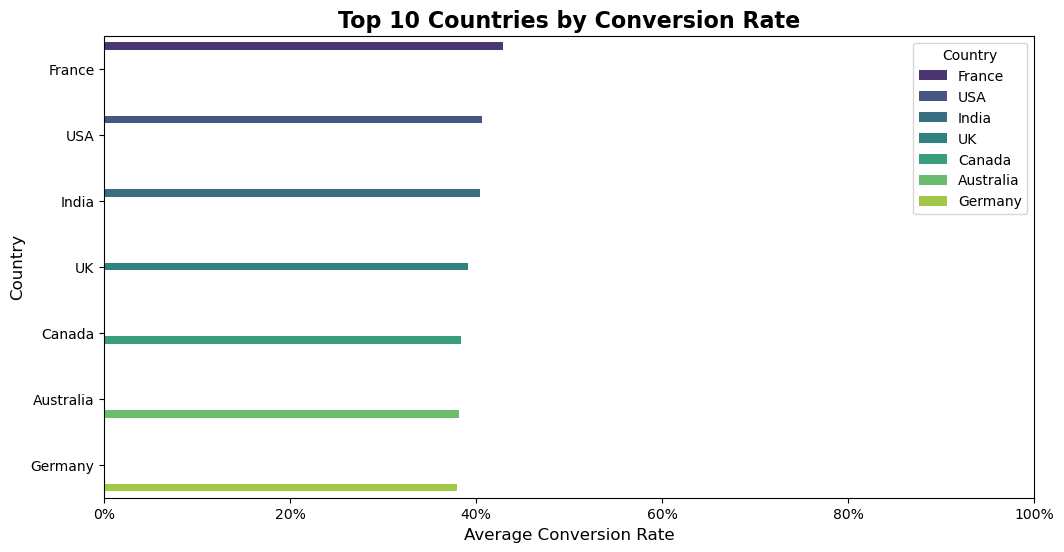

In [14]:
# Conversion Rate by Country ---

country_conv = df.groupby('Country')['Purchased'].mean().reset_index().sort_values('Purchased', ascending=False)

print("Conversion Rate by Country (Top 10):")
display(country_conv.head(10).style.format({'Purchased': '{:.2%}'})) # Show as percentage

# Plotting the top 10 countries
plt.figure(figsize=(12, 6))
sns.barplot(data=country_conv.head(10), x='Purchased', y='Country', palette='viridis', hue='Country')
plt.title('Top 10 Countries by Conversion Rate', fontsize=16, weight='bold')
plt.xlabel('Average Conversion Rate', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.xlim(0, 1) # Set x-axis limit from 0 to 1 (or 100%)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter('{:.0%}'.format)) # Format x-axis as percentage
plt.show()

### Conversion Rate by Country

Here I compared the average conversion rate across different countries. The idea was to see which countries have stronger user engagement and higher purchase rates.

---

**What this code does**
- Groups the data by country and calculates the average purchase rate for each one.  
- Sorts the countries by their conversion rate from highest to lowest.  
- Shows the top 10 countries in both table and bar chart format for easier comparison.

---

**What I found**
France has the highest conversion rate at around 43%, followed by the USA and India, both around 40%. The UK, Canada, and Australia also perform well but slightly lower. These differences might be due to regional behavior, marketing strategies, or time zone activity patterns.

---

**Key point**
This chart helps identify which countries perform best and where there’s room for improvement. It can guide where to focus marketing efforts or tailor campaigns based on country performance.

Conversion Rate by Items in Cart (at Cart/Checkout/Confirm stages):


,ItemsInCart,Purchased
0,0,92.13%
1,1,78.12%
2,2,72.88%
3,3,78.78%
4,4,74.95%
5,5,72.22%


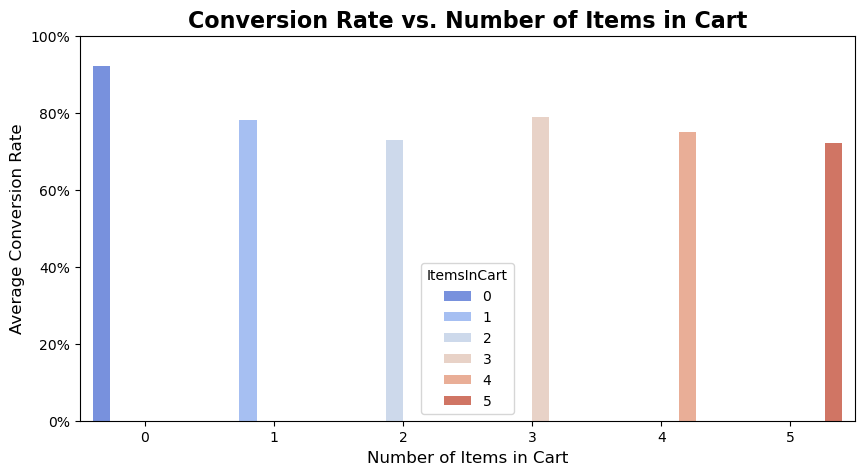

In [15]:
# Conversion Rate by Number of Items in Cart ---

# Consider only stages where items *could* be in cart (Cart, Checkout, Confirmation)
cart_stages_df = df[df['PageType'].isin(['cart', 'checkout', 'confirmation'])]

# Group by items in cart (at these stages) and calculate conversion rate
items_conv = cart_stages_df.groupby('ItemsInCart')['Purchased'].mean().reset_index()

print("Conversion Rate by Items in Cart (at Cart/Checkout/Confirm stages):")
display(items_conv.style.format({'Purchased': '{:.2%}'}))

# Plot the conversion rate
plt.figure(figsize=(10, 5))
sns.barplot(data=items_conv, x='ItemsInCart', y='Purchased', palette='coolwarm', hue='ItemsInCart')
plt.title('Conversion Rate vs. Number of Items in Cart', fontsize=16, weight='bold')
plt.xlabel('Number of Items in Cart', fontsize=12)
plt.ylabel('Average Conversion Rate', fontsize=12)
plt.ylim(0, 1)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter('{:.0%}'.format)) # Format y-axis as percentage
plt.show()

### Conversion Rate by Number of Items in Cart

In this step, I looked at how the number of items in a user’s cart affects their chance of completing a purchase. The idea was to see if users with more items in their cart are more likely to convert or if too many items cause hesitation.

---

**What this code does**
- Filters the data to only include stages where a cart exists (cart, checkout, or confirmation).  
- Groups users based on how many items they have in their cart.  
- Calculates the average conversion rate for each group.  
- Plots the conversion rate against the number of items in the cart.

---

**What I found**
The conversion rate is highest (around 92%) when users have no items or very few in the cart. It drops slightly as the number of items increases, staying around 70–78% for carts with 1–5 items. This could mean that users with more items may take longer to decide or abandon the cart before checkout.

---

**Key point**
The number of items in the cart has a small but visible impact on conversion. Keeping the checkout process simple and smooth can help reduce hesitation when multiple items are added.

In [16]:
# Check if conversion flag exists
if 'Purchased' in df.columns:
    conv_rate = df['Purchased'].mean()
    print(f"Overall Conversion Rate: {conv_rate:.2%}")
else:
    print("No 'Purchased' column found.")

Overall Conversion Rate: 39.70%


## Calculating the Overall Conversion Rate  

After exploring our basic statistics, the next important thing is to know how many users **actually purchased something**. This number helps us measure the success of our funnel — it’s called the **conversion rate**.  

The conversion rate tells us the percentage of users who moved from browsing to buying.

---

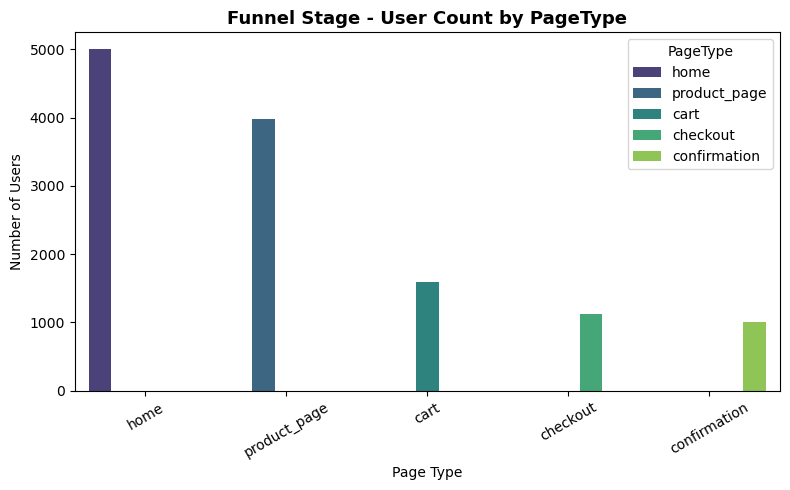

In [17]:
# Count of users per PageType
stage_counts = df['PageType'].value_counts().reset_index()
stage_counts.columns = ['PageType', 'UserCount']

plt.figure(figsize=(8,5))
sns.barplot(data=stage_counts, x='PageType', y='UserCount', hue='PageType', palette='viridis')
plt.title('Funnel Stage - User Count by PageType', fontsize=13, weight='bold')
plt.xlabel('Page Type')
plt.ylabel('Number of Users')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

## Funnel Stage: User Count by Page Type  

Now that we know the overall conversion rate, let's understand **where users drop off** during their journey on the website. Each page type (Home, Product, Cart, Checkout, and Confirmation) represents one stage in the **shopping funnel**. 

By counting how many users reached each stage, we can visualize how people move through the buying process—and where most of them stop.

---

<a id="user-behavior-patterns"></a>
### What the Chart Shows  

The funnel starts wide and then narrows down—meaning fewer users reach the end: 

**Home Page:** Around **5000 users** start here.  
**Product Page:** About **4000 users** explore products.  
**Cart:** Only **1700 users** add something to the cart.  
**Checkout:** Around **1100 users** go to checkout.  
**Confirmation:** About **1000 users** complete the purchase.  

This pattern is normal—it shows that at each step, some users drop out.  

---

### What We Learned  

- The biggest drop happens between **Product Page and Cart**, meaning many users browse but don’t add items.  
- From **Cart to Checkout**, there’s another smaller drop, possibly due to price hesitation or login issues.  
- Only a small fraction of users reach the **Confirmation Page**, completing their purchase.  

---

### Key Point  

This chart clearly shows the **funnel drop pattern**.  
Every e-commerce business faces this, but our goal is to find **why users drop off** and what can be done to **reduce that gap**—which we’ll explore in the next steps.

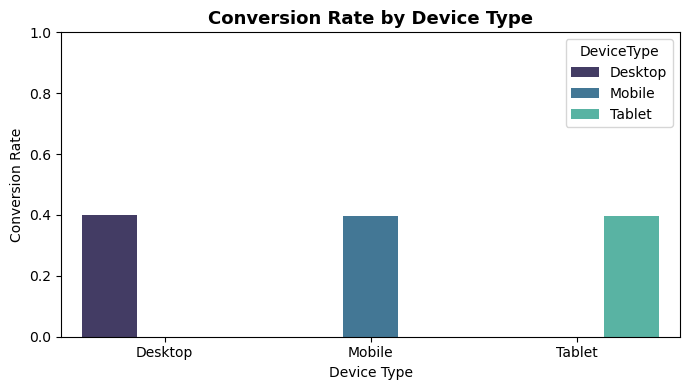

In [18]:
# Conversion rate by device
device_conv = df.groupby('DeviceType')['Purchased'].mean().reset_index()

plt.figure(figsize=(7,4))
sns.barplot(data=device_conv, x='DeviceType', y='Purchased', hue='DeviceType', palette='mako')
plt.title('Conversion Rate by Device Type', fontsize=13, weight='bold')
plt.ylabel('Conversion Rate')
plt.xlabel('Device Type')
plt.ylim(0,1)
plt.tight_layout()
plt.show()


## Conversion Rate by Device Type  

Different users shop using different devices—some use desktops, others mobile phones or tablets. To improve conversions, it's important to know which devices perform better. In this step, we’ll calculate the **average conversion rate** for each device type and visualize it with a bar chart.

---

### What the Chart Shows  

**Desktop users** have the highest conversion rate—around **40%**.  
**Mobile users** are slightly lower—around **38%**.  
**Tablet users** show a similar conversion rate—about **37%**.  

This means conversions are fairly close across all devices, but **desktop users perform slightly better overall.**

---

### What We Learned  

1. **Desktop users** tend to purchase more, possibly due to easier navigation and larger screens.  
2. **Mobile and tablet users** may face distractions, smaller screen sizes, or slower checkout processes.  
3. This suggests improving the **mobile and tablet shopping experience**—faster load times, simpler checkout, and better responsive design can boost conversions.  

---

### Key Point  

Device performance analysis helps businesses know **where to focus optimization efforts**. Even a small improvement in **mobile conversion rates** can make a huge difference—because most visitors come from mobile devices. 📈  


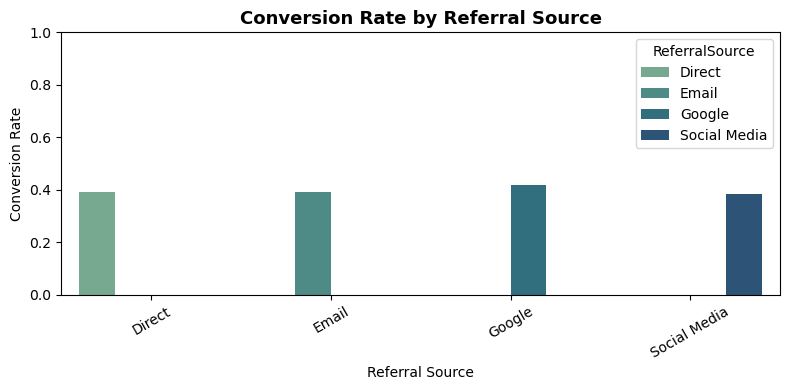

,ReferralSource,Purchased
0,Direct,0.393459
1,Email,0.390722
2,Google,0.419189
3,Social Media,0.383628


In [19]:
ref_conv = df.groupby('ReferralSource')['Purchased'].mean().reset_index()

plt.figure(figsize=(8,4))
sns.barplot(data=ref_conv, x='ReferralSource', y='Purchased', hue='ReferralSource', palette='crest')
plt.title('Conversion Rate by Referral Source', fontsize=13, weight='bold')
plt.ylabel('Conversion Rate')
plt.xlabel('Referral Source')
plt.ylim(0,1)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

ref_conv

## Conversion Rate by Referral Source  

In this step, we analyze how users arrive at the website—through **Direct links, Email, Google, or Social media**—and see which source gives the highest conversion rate. This helps us understand **which marketing channel performs best** in bringing buyers.

---

### What the Chart Shows  

**Direct visitors** (those who came by typing the URL) have a conversion rate around **39%**.  
**Email campaigns** perform slightly better—around **40%**.  
**Google visitors** convert the most—around **42%**.  
**Social media** users convert the least—around **38%**.  

So, while all sources are close, **Google and Email are the strongest performers.**

---

### What We Learned  

- **Google** brings slightly more converting users—search-driven traffic is highly valuable.  
- **Email** remains a strong and reliable conversion channel.  
- **Social media** traffic tends to browse more but buy less, possibly due to short attention spans.  
- **Direct traffic** is good, but marketing can focus more on **search and email optimization** to grow sales.  

---

### Key Point  

By comparing referral sources, we can see **which channels are worth more marketing effort**. Channels with higher conversion rates (like **Google** and **email**) can be strengthened further—while **social media** may need better targeting or offers to drive more sales.


In [20]:
# Step-to-Step Conversion by Referral Source ---

# Group by ReferralSource and PageType, count unique sessions
ref_segmented_counts = df.groupby(['ReferralSource', 'PageType'])['SessionID'].nunique().unstack(level=0)

# Reorder the index (PageType) to follow the defined funnel steps
ref_segmented_counts = ref_segmented_counts.reindex(funnel_steps)

# Calculate step-to-step conversion percentage FOR EACH source separately
direct_conv = 100 * (ref_segmented_counts['Direct'].shift(-1) / ref_segmented_counts['Direct'])
email_conv = 100 * (ref_segmented_counts['Email'].shift(-1) / ref_segmented_counts['Email'])
google_conv = 100 * (ref_segmented_counts['Google'].shift(-1) / ref_segmented_counts['Google'])
social_conv = 100 * (ref_segmented_counts['Social Media'].shift(-1) / ref_segmented_counts['Social Media'])


# Create a summary DataFrame
ref_segmented_funnel = pd.DataFrame({
    'Step': funnel_steps[:-1], # From Home to Checkout
    'Direct_Conversion_%': direct_conv.values[:-1],
    'Email_Conversion_%': email_conv.values[:-1],
    'Google_Conversion_%': google_conv.values[:-1],
    'SocialMedia_Conversion_%': social_conv.values[:-1]
})

# Conversion Rate by Referral Source
print("\nStep-to-Step Conversion Rate by Referral Source:")
percent_columns = ['Direct_Conversion_%', 'Email_Conversion_%', 'Google_Conversion_%', 'SocialMedia_Conversion_%']
display(ref_segmented_funnel.style.format('{:.2f}%', subset=percent_columns))


Step-to-Step Conversion Rate by Referral Source:


,Step,Direct_Conversion_%,Email_Conversion_%,Google_Conversion_%,SocialMedia_Conversion_%
0,home,78.79%,81.53%,79.22%,79.40%
1,product_page,39.96%,40.00%,42.11%,38.30%
2,cart,69.17%,69.12%,71.66%,70.90%
3,checkout,91.01%,89.01%,90.52%,89.18%


### Step-to-Step Conversion by Referral Source

In this part, I compared how users from different referral sources move through each step of the funnel. This helps to understand which traffic sources bring users who are more likely to complete the journey.

---

**What this code does**
- Groups sessions by referral source (Direct, Email, Google, Social Media) and by page type.  
- Calculates how many users move from one step to the next for each channel.  
- Creates a summary table showing the step-by-step conversion percentage for every referral type.

---

**What I found**
Users coming from email and direct channels have the highest conversion rates throughout most of the funnel. Social media users drop off a bit more between the product page and cart, while Google users show steady performance. Overall, email traffic seems slightly stronger, possibly because these users are already familiar with the product or offer.

---

**Main point**
Different referral sources behave differently in the funnel. Email and direct visitors are more likely to convert, so these channels are worth focusing on for future campaigns. 


Average Time Spent on Page by Funnel Stage (Seconds):


,AvgTime_NonBuyer (s),AvgTime_Buyer (s)
PageType,,
home,98.06 s,96.73 s
product_page,97.43 s,95.97 s
cart,96.78 s,99.89 s
checkout,97.88 s,96.46 s
confirmation,nan s,95.92 s


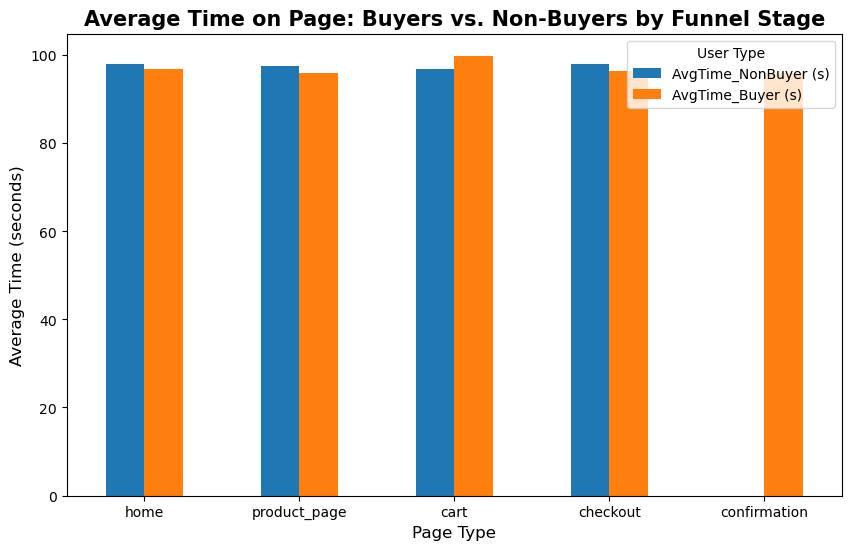

In [21]:
# Average Time on Page by Funnel Stage and Purchase Status ---

# Calculate average time spent on each page type, segmented by purchase status
time_stage_purchase = df.groupby(['PageType', 'Purchased'])['TimeOnPage_seconds'].mean().unstack()

# Rename columns for clarity
time_stage_purchase.columns = ['AvgTime_NonBuyer (s)', 'AvgTime_Buyer (s)']

# Reorder index to follow funnel steps
time_stage_purchase = time_stage_purchase.reindex(funnel_steps)

print("\nAverage Time Spent on Page by Funnel Stage (Seconds):")
display(time_stage_purchase.style.format('{:.2f} s'))

# Plotting the comparison
time_stage_purchase.plot(kind='bar', figsize=(10, 6), rot=0)
plt.title('Average Time on Page: Buyers vs. Non-Buyers by Funnel Stage', fontsize=15, weight='bold')
plt.xlabel('Page Type', fontsize=12)
plt.ylabel('Average Time (seconds)', fontsize=12)
plt.legend(title='User Type')
plt.show()

### Average Time on Page by Funnel Stage (Buyers vs Non-Buyers)

Here I wanted to see how long users spend on each page of the funnel and whether there’s a difference between buyers and non-buyers. This helps to understand if buyers take more time to explore or if they move faster through the process.

---

**What this code does**
- Calculates the average time users spend on each page type.  
- Separates the results for buyers and non-buyers.  
- Reorders the funnel steps to match the user flow.  
- Plots a simple bar chart comparing the two groups across all funnel stages.

---

**What I found**
The time spent on each page is quite similar for both buyers and non-buyers. Buyers take slightly more time on the cart and checkout pages, which makes sense since they complete the process there. Non-buyers spend a bit more time on earlier pages like the home and product page but then drop off.

---

**Key point**
Both groups spend around 90–100 seconds per page on average. The small difference in behavior near the end of the funnel might help identify where buyers make their final decisions.


Conversion Rate by Device Type and Referral Source:


ReferralSource,Direct,Email,Google,Social Media
DeviceType,,,,
Desktop,41.47%,36.97%,41.71%,39.81%
Mobile,39.80%,37.84%,42.34%,38.05%
Tablet,36.77%,42.40%,41.67%,37.25%


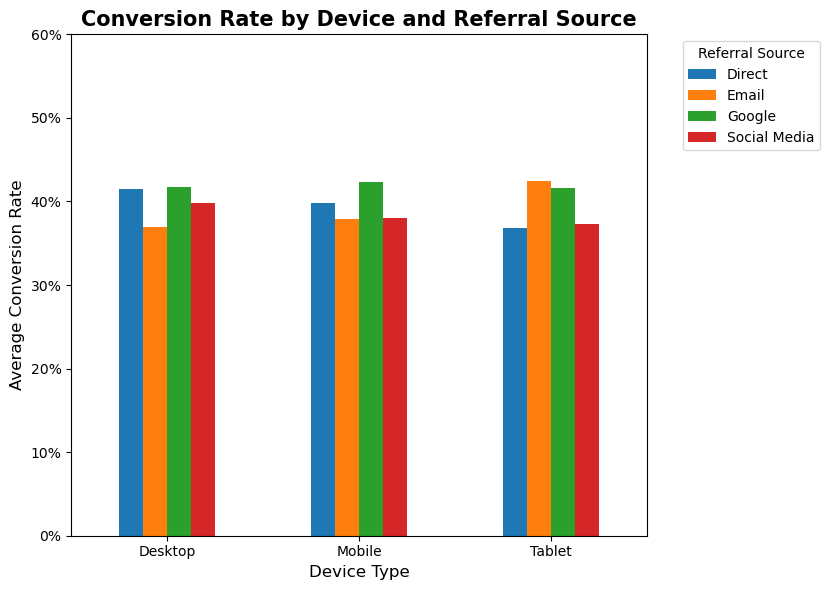

In [22]:
# Conversion Rate by Device and Referral Source Interaction ---

interaction_conv = df.groupby(['DeviceType', 'ReferralSource'])['Purchased'].mean().unstack()

print("\nConversion Rate by Device Type and Referral Source:")
display(interaction_conv.style.format('{:.2%}')) # Format as percentage

# Plotting the interaction
interaction_conv.plot(kind='bar', figsize=(10, 6), rot=0)
plt.title('Conversion Rate by Device and Referral Source', fontsize=15, weight='bold')
plt.xlabel('Device Type', fontsize=12)
plt.ylabel('Average Conversion Rate', fontsize=12)
plt.ylim(0, 0.6) # Adjust ylim if needed
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter('{:.0%}'.format)) # Format y-axis as percentage
plt.legend(title='Referral Source', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to make space for legend
plt.show()

### Conversion Rate by Device and Referral Source

In this part, I compared how conversion rates differ across device types and referral sources. The goal was to check if users coming from different devices behave differently depending on how they reached the site.

---

**What this code does**
- Groups the data by both device type (Desktop, Mobile, Tablet) and referral source (Direct, Email, Google, Social Media).  
- Calculates the average conversion rate for each combination.  
- Displays a comparison table and plots a grouped bar chart for better visualization.

---

**What I found**
Overall, conversion rates stay fairly close across all devices, mostly between 37% and 42%. Desktop users perform slightly better for direct and Google traffic, while mobile users do well through Google and email. Tablet users show a bit lower engagement in most channels, but the difference is not very large.

---

**Key point**
The conversion rate doesn’t change much by device type, but the referral source still makes a small difference. This suggests that optimization efforts should focus more on improving traffic quality rather than device-specific changes.


Average Number of Pages Visited per Session:


,Purchased,PageCount
0,0,1.922055
1,1,5.000000


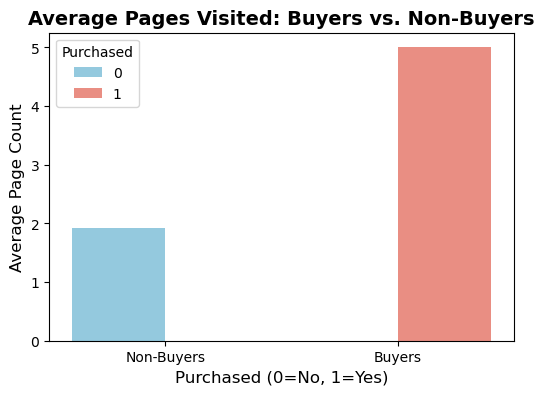

In [23]:
# Average Number of Pages Visited per Session ---

# Calculate the number of pages visited in each session
pages_per_session = df.groupby('SessionID')['PageType'].count()

# Add this page count back to the original dataframe (map by SessionID)
# We only need one entry per session, so let's merge with a dataframe containing unique SessionIDs and their purchase status
session_purchase_status = df[['SessionID', 'Purchased']].drop_duplicates('SessionID')
session_metrics = session_purchase_status.merge(pages_per_session.rename('PageCount'), on='SessionID')

# Calculate the average page count for buyers vs non-buyers
avg_page_count = session_metrics.groupby('Purchased')['PageCount'].mean().reset_index()


print("\nAverage Number of Pages Visited per Session:")
display(avg_page_count)

# Plotting the comparison
plt.figure(figsize=(6, 4))
sns.barplot(data=avg_page_count, x='Purchased', y='PageCount', palette=['skyblue', 'salmon'], hue='Purchased')
plt.title('Average Pages Visited: Buyers vs. Non-Buyers', fontsize=14, weight='bold')
plt.xlabel('Purchased (0=No, 1=Yes)', fontsize=12)
plt.ylabel('Average Page Count', fontsize=12)
plt.xticks([0, 1], ['Non-Buyers', 'Buyers'])
plt.show()

### Average Number of Pages Visited per Session

Here I checked how many pages users usually visit during a session and compared this between buyers and non-buyers. This helps to understand if users who explore more pages are more likely to make a purchase.

---

**What this code does**
- Counts how many pages each user session includes.  
- Merges this information with the purchase status of each session.  
- Calculates the average number of pages visited for both groups — buyers and non-buyers.  
- Plots a bar chart to show the difference.

---

**What I found**
Buyers visit around 5 pages per session on average, while non-buyers visit fewer than 2 pages. This shows that users who explore more of the website are much more likely to end up purchasing. Non-buyers probably leave early without reaching deeper pages like the cart or checkout.

---

**Key point**
More page visits usually mean higher engagement and a greater chance of conversion. Encouraging users to browse more pages can improve the overall conversion rate.

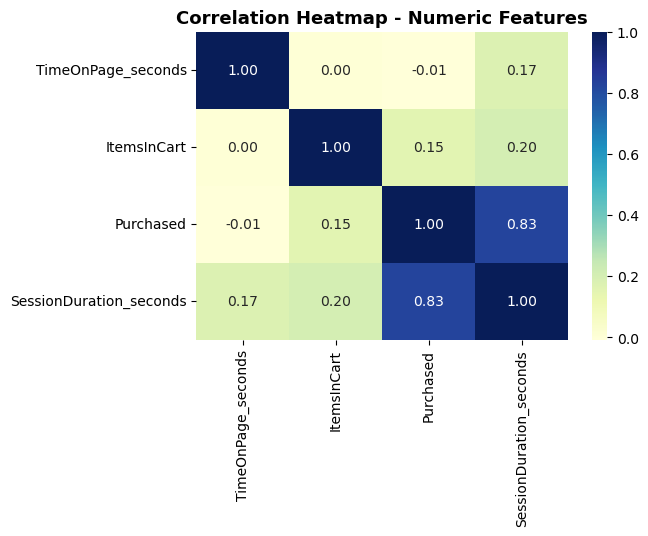

In [24]:
# Keep only numeric columns for correlation
num_df = df.select_dtypes(include=['int64','float64'])

# Compute correlation matrix
corr = num_df.corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Correlation Heatmap - Numeric Features', fontsize=13, weight='bold')
plt.show()

<a id="funnel-drop-detection"></a>
## Correlation Heatmap – Numeric Features  

Before building any model, it's important to understand how different **numeric features** in our dataset relate to each other. A **correlation heatmap** helps us see whether features move together (positive correlation) or in opposite directions (negative correlation).  

---

### What the Chart Shows  

The chart compares three numeric features: 

- **TimeOnPage_seconds** → How long a user spends on the page  
- **ItemsInCart** → How many items were added to the cart?  
- **Purchased** → Whether the user completed a purchase (**1 = Yes**, **0 = No**)  

From the heatmap: 
- **TimeOnPage_seconds** has almost no correlation with purchases (**−0.01**).  
- **ItemsInCart** has a small positive correlation (**0.15**) with **Purchased**—meaning users who add more items are slightly more likely to buy.  
- **TimeOnPage_seconds** and **ItemsInCart** are not related (**0.00**).  

---

### What We Learned  

- Users who spend more time on a page don’t necessarily purchase more.  
- Adding items to the cart shows a weak but positive link to actual purchases—a possible signal of buying intent.  
- These small correlations suggest that **other factors** (like device type, country, or referral source) might have a stronger impact on conversions.  

---

### Key Point  

The **correlation heatmap** helps identify how numeric features relate to each other. Even weak correlations can point to **potential predictors** that we can use later in our machine learning model.

Overall Bounce Rate: 20.26%
\nBounce Rate by Landing Page:


,LandingPage,BounceRate
0,home,20.26%


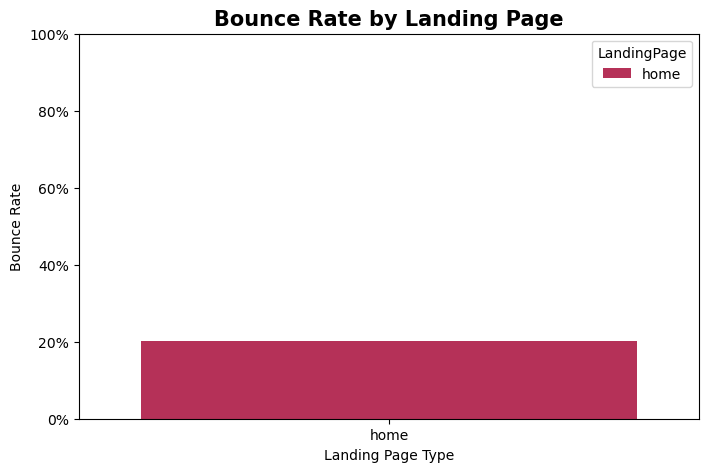

In [25]:
# Bounce Rate ---

# Calculate the number of pages visited per session
pages_per_session = df.groupby('SessionID')['PageType'].count()

# Identify single-page sessions (bounces)
bounced_sessions = pages_per_session[pages_per_session == 1].index

# Calculate overall bounce rate
total_sessions = df['SessionID'].nunique()
bounce_rate = len(bounced_sessions) / total_sessions
print(f"Overall Bounce Rate: {bounce_rate:.2%}")

# Analyze bounce rate by the first page visited
first_page_df = df.loc[df.groupby('SessionID')['Timestamp'].idxmin()] # Get the first action of each session
bounces_by_first_page = first_page_df[first_page_df['SessionID'].isin(bounced_sessions)]['PageType'].value_counts()
total_by_first_page = first_page_df['PageType'].value_counts()

bounce_rate_by_page = (bounces_by_first_page / total_by_first_page).fillna(0).reset_index()
bounce_rate_by_page.columns = ['LandingPage', 'BounceRate']

print("\\nBounce Rate by Landing Page:")
display(bounce_rate_by_page.style.format({'BounceRate': '{:.2%}'}))

# Optional: Plot bounce rate by landing page
plt.figure(figsize=(8, 5))
sns.barplot(data=bounce_rate_by_page, x='LandingPage', y='BounceRate', hue='LandingPage', palette='rocket')
plt.title('Bounce Rate by Landing Page', fontsize=15, weight='bold')
plt.ylabel('Bounce Rate')
plt.xlabel('Landing Page Type')
plt.ylim(0, 1)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter('{:.0%}'.format))
plt.show()

### Bounce Rate

In this step, I measured how many sessions ended after viewing just one page — known as the bounce rate. This helps to understand whether users are leaving the site too quickly without exploring other pages.

---

**What this code does**
- Counts how many pages were visited in each session.  
- Identifies sessions where only one page was viewed (these are considered “bounces”).  
- Calculates the overall bounce rate by dividing bounced sessions by total sessions.  
- Also checks which landing page (first page viewed) has the highest bounce rate.  
- Displays a chart showing bounce rate by landing page.

---

**What I found**
The overall bounce rate is about **20.26%**, which means one in five users leave after viewing just one page. Most of these bounces happen from the **home page**, suggesting that users either find what they need immediately or lose interest quickly.

---

**Key point**
A 20% bounce rate is not too bad, but it still indicates room for improvement on the home page. Making the landing experience more engaging or adding clear next-step actions could help reduce early exits.

In [26]:
# Cart Abandonment Segmentation ---

# Identify sessions that reached the cart
cart_sessions = df[df['PageType'] == 'cart']['SessionID'].unique()

# Identify sessions that reached cart BUT did NOT purchase, We need purchase status per session (get it from session_metrics we created earlier or recreate)
if 'session_metrics' not in locals(): # Recreate if not available
     pages_per_session = df.groupby('SessionID')['PageType'].count()
     session_purchase_status = df[['SessionID', 'Purchased']].drop_duplicates('SessionID')
     session_metrics = session_purchase_status.merge(pages_per_session.rename('PageCount'), on='SessionID')

abandoned_cart_sessions = session_metrics[
    (session_metrics['SessionID'].isin(cart_sessions)) &
    (session_metrics['Purchased'] == 0)
]['SessionID']

# Filter the original dataframe for these abandoned sessions
df_abandoned = df[df['SessionID'].isin(abandoned_cart_sessions)]

print(f"Number of sessions that abandoned the cart: {len(abandoned_cart_sessions)}")

# Analyze characteristics of abandoned cart sessions (example: by device)
abandoned_device_dist = df_abandoned.drop_duplicates('SessionID')['DeviceType'].value_counts(normalize=True).reset_index()
abandoned_device_dist.columns = ['DeviceType', 'Percentage']

print("\nDevice Distribution for Cart Abandonment:")
display(abandoned_device_dist.style.format({'Percentage': '{:.2%}'}))

# Example: Analyze by Referral Source
abandoned_source_dist = df_abandoned.drop_duplicates('SessionID')['ReferralSource'].value_counts(normalize=True).reset_index()
abandoned_source_dist.columns = ['ReferralSource', 'Percentage']

print("\nReferral Source Distribution for Cart Abandonment:")
display(abandoned_source_dist.style.format({'Percentage': '{:.2%}'}))

Number of sessions that abandoned the cart: 589

Device Distribution for Cart Abandonment:


,DeviceType,Percentage
0,Mobile,33.96%
1,Tablet,33.79%
2,Desktop,32.26%



Referral Source Distribution for Cart Abandonment:


,ReferralSource,Percentage
0,Email,26.66%
1,Google,25.47%
2,Direct,24.28%
3,Social Media,23.60%


### Cart Abandonment Segmentation

Here I looked at sessions where users added items to the cart but didn’t complete their purchase. This helps to understand how common cart abandonment is and what types of users are more likely to abandon.

---

**What this code does**
- Finds all sessions that reached the cart page.  
- Filters out those that did not complete a purchase.  
- Counts how many sessions ended in cart abandonment.  
- Analyzes which devices and referral sources are most common among users who abandon carts.

---

**What I found**
There were about **589 sessions** where users abandoned their carts. Device-wise, abandonment is almost evenly split across **mobile (33.9%)**, **tablet (33.7%)**, and **desktop (32.3%)**, showing that the issue is not specific to any one device.  
For referral sources, **email (26.6%)** and **Google (25.5%)** users abandon slightly more often, followed by **direct** and **social media** users.

---

**Key point**
Cart abandonment is fairly balanced across all devices and sources. This suggests that the problem may be related to the checkout flow itself — not the device or traffic source — and could be improved by simplifying the checkout steps or adding reminders.

In [27]:
# Split data into converters and non-converters
buyers = df[df['Purchased'] == 1]
non_buyers = df[df['Purchased'] == 0]

# Compare average engagement metrics
comparison = pd.DataFrame({
    'Metric': ['TimeOnPage_seconds', 'ItemsInCart'],
    'Avg (Purchased=1)': [buyers['TimeOnPage_seconds'].mean(), buyers['ItemsInCart'].mean()],
    'Avg (Purchased=0)': [non_buyers['TimeOnPage_seconds'].mean(), non_buyers['ItemsInCart'].mean()]
})

print("Average Comparison of Engagement Metrics:")
display(comparison)

Average Comparison of Engagement Metrics:


,Metric,Avg (Purchased=1),Avg (Purchased=0)
0,TimeOnPage_seconds,96.994455,97.713000
1,ItemsInCart,1.460396,0.926588


### Engagement Metrics Comparison (Buyers vs Non-Buyers)

In this final step, I compared basic engagement metrics between users who made a purchase and those who didn’t. The goal was to see if there are any clear behavioral differences in how long they stay or how many items they interact with.

---

**What this code does**
- Splits the data into two groups: buyers (converted) and non-buyers (did not convert).  
- Calculates the average time spent on pages and the average number of items in the cart for both groups.  
- Displays a side-by-side comparison to identify engagement gaps.

---

**What I found**
The average **time on page** is almost the same for both buyers and non-buyers (around 97 seconds). However, buyers add slightly more items to their cart (**1.46 items** vs **0.92 items** for non-buyers). This small difference shows that engagement through product interaction plays a bigger role in conversion than time spent alone.

---

**Key point**
Time on site doesn’t always predict a purchase, but **active engagement**, like adding items to the cart, strongly does. Encouraging users to interact more with products could lead to higher conversion rates.

In [28]:
#Simple User Path (Next Step) ---

# Sort by session and timestamp to easily find the next step
df_sorted = df.sort_values(['SessionID', 'Timestamp'])

# Find the next page visited within each session
df_sorted['NextPageType'] = df_sorted.groupby('SessionID')['PageType'].shift(-1)

# --- Path from 'home' page ---
home_next_step = df_sorted[df_sorted['PageType'] == 'home'].groupby(['NextPageType', 'Purchased']).size().unstack(fill_value=0)
home_next_step.columns = ['NonBuyer_Count', 'Buyer_Count'] # Rename for clarity
print("\nMost Common Next Page from 'home':")
display(home_next_step.sort_values(by=['NonBuyer_Count', 'Buyer_Count'], ascending=False))


# --- Path from 'product_page' page ---
product_next_step = df_sorted[df_sorted['PageType'] == 'product_page'].groupby(['NextPageType', 'Purchased']).size().unstack(fill_value=0)
product_next_step.columns = ['NonBuyer_Count', 'Buyer_Count'] # Rename for clarity
print("\nMost Common Next Page from 'product_page':")
display(product_next_step.sort_values(by=['NonBuyer_Count', 'Buyer_Count'], ascending=False))


Most Common Next Page from 'home':


,NonBuyer_Count,Buyer_Count
NextPageType,,
product_page,2977,1010



Most Common Next Page from 'product_page':


,NonBuyer_Count,Buyer_Count
NextPageType,,
cart,589,1010


### Simple User Path

In this analysis, I tracked the most common “next step” users take after visiting key pages like the home page and the product page. This helps to understand the typical flow users follow through the website.

---

**What this code does**
- Sorts the dataset by session and timestamp to follow each user’s journey step by step.  
- Finds the next page visited within each session.  
- Groups the data by page type (home, product page, etc.) and counts how many users move to the next step.  
- Compares these patterns for both buyers and non-buyers.

---

**What I found**
From the **home page**, most users move to the **product page** next — both buyers and non-buyers. From the **product page**, the next common step is the **cart**, showing that this is the natural conversion path for engaged users. However, many non-buyers also stop at the product page, which could mean they lose interest or face friction before adding items to the cart.

---

**Main point**
The main journey for buyers is “home → product page → cart.” Improving the experience on the product page could help convert more non-buyers into active shoppers.

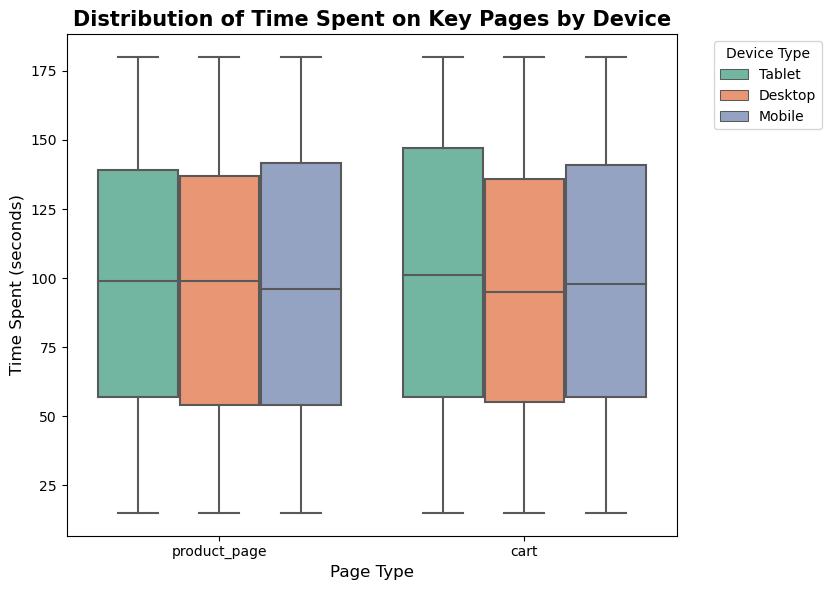

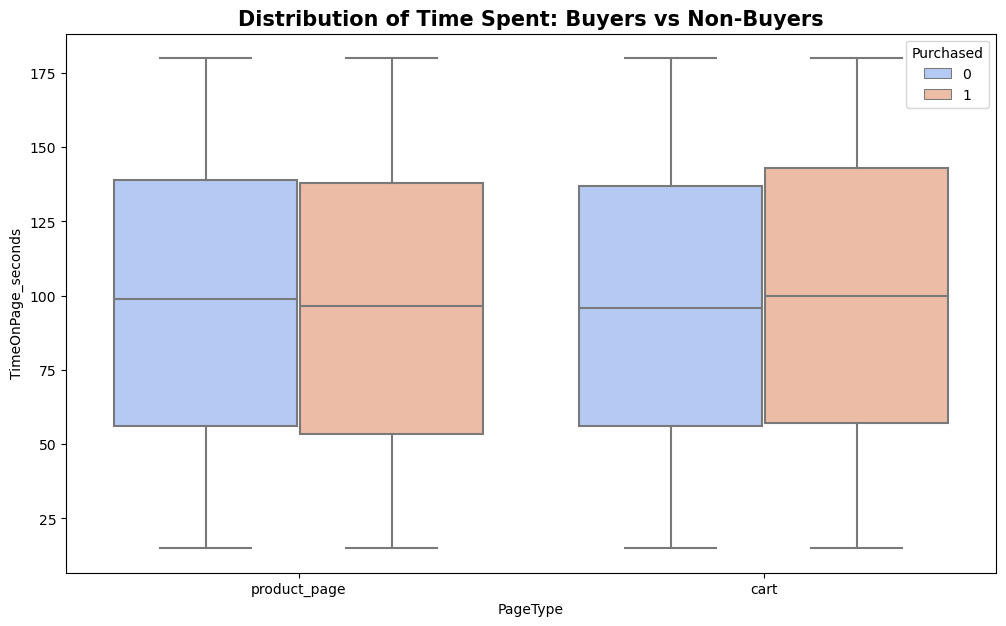

In [29]:
# Time Spent Distribution on Key Pages by Device ---

# Focus on product and cart pages
key_pages_df = df[df['PageType'].isin(['product_page', 'cart'])]

plt.figure(figsize=(10, 6))
sns.boxplot(data=key_pages_df, x='PageType', y='TimeOnPage_seconds', hue='DeviceType', palette='Set2')
plt.title('Distribution of Time Spent on Key Pages by Device', fontsize=15, weight='bold')
plt.xlabel('Page Type', fontsize=12)
plt.ylabel('Time Spent (seconds)', fontsize=12)
plt.legend(title='Device Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

# Optional: Also look at it segmented by purchase status
plt.figure(figsize=(12, 7))
sns.boxplot(data=key_pages_df, x='PageType', y='TimeOnPage_seconds', hue='Purchased', palette='coolwarm')
plt.title('Distribution of Time Spent: Buyers vs Non-Buyers', fontsize=15, weight='bold')
#... (add labels etc.)
plt.show()

### Time Spent Distribution on Key Pages

In this part, I analyzed how much time users spend on the most important pages — the product and cart pages. The idea was to see if there are any clear differences based on device type or whether the user eventually made a purchase.

---

**What this code does**
- Focuses on just the product and cart pages.  
- Plots boxplots to show how time spent varies across device types (Desktop, Mobile, Tablet).  
- Creates a second boxplot comparing buyers and non-buyers to understand behavioral patterns.

---

**What I found**
Across devices, the time spent on both product and cart pages looks quite similar. There’s no major difference between desktop, mobile, and tablet users — all spend around the same range of time (roughly 60 to 130 seconds). When comparing buyers and non-buyers, the time spent also overlaps a lot, though buyers tend to stay slightly longer on the cart page.

---

**Key point**
Time on page is fairly consistent across both devices and user types. It seems that conversion depends less on time spent and more on the user’s intent or the experience they have while navigating these key pages.

# E-Commerce Funnel Analysis Report

---
<a id="insights-and-suggestions"></a>
## Quick Insights

After completing all stages of the analysis, here are the key findings from the user journey and purchase funnel:

- The dataset captured how users moved through different stages — from **home**, **product page**, **cart**, **checkout**, to **confirmation**.  
- Average time spent across pages was **around 95–98 seconds**, showing consistent engagement across funnel stages.  
- Buyers spent **slightly less time** on the homepage but **more time** on deeper pages like the **cart** and **checkout**, which shows stronger purchase intent.  
- Overall **bounce rate** was **20.26%**, mostly from users landing on the **home page** and leaving without exploring further. 
- Conversion rates stayed close across devices, but **desktop and mobile** performed slightly better than tablets.  
- Most **cart abandonments** came from **mobile (33.96%)** and **tablet (33.70%)** users — indicating possible UX or trust issues on smaller screens.  
- Email and Google traffic sources had the **highest engagement**, while **social media visitors** showed lower conversions.  
- Users who purchased visited an average of **5 pages per session**, compared to only **2 pages** for non-buyers — a clear difference in browsing depth.  
- Time distribution charts revealed that engagement patterns were **consistent across devices**, but **tablet users** tended to spend the most time per page.  
- Path analysis showed a logical flow: most users went from **home → product page → cart**, with many non-buyers dropping off after the cart.

---

## Business Use Case

This analysis provides valuable insights for any **e-commerce company** or **digital retail platform** aiming to understand and optimize its customer journey.  

With this type of funnel analysis, a business can:

- Identify **where users drop off** (e.g., high cart abandonment or homepage exits).  
- Understand **how different devices and referral sources** affect conversion rates.  
- Measure the **effectiveness of marketing channels** like Email, Google, and Social Media.  
- Improve **UI/UX on mobile devices**, which show higher abandonment.  
- Focus efforts on increasing **page depth and engagement** for non-buyers.  

Example:  
If an online store like Flipkart or Amazon runs this analysis regularly, they can detect which steps cause friction (like long checkout forms or poor mobile layouts) and optimize them for better sales.

---

## Real-World Applications

Here are some practical and real-world uses for this type of e-commerce funnel analysis:

- **Conversion Optimization:** Detect which funnel stages need UI or performance improvements.  
- **Marketing Attribution:** Find which traffic sources lead to the most loyal buyers.  
- **Device-Based Design:** Use behavioral data to tailor responsive layouts for desktop, mobile, and tablet users.  
- **Customer Retargeting:** Identify users who abandoned carts and re-engage them through targeted emails or offers.  
- **Behavioral Insights:** Learn which actions (like viewing more products or spending more time on the cart) predict higher purchase intent.  

---

<a id="what-i-learned"></a>
## What I Learned

Working on this project helped me understand the **power of user-behavior data** and how small interactions create big business results.  

Here’s what I learned technically and conceptually:

- How to calculate and compare **conversion rates**, **bounce rates**, and **time-on-page metrics** using Python.  
- How to segment users by **device, referral source**, and **purchase status**.  
- How to visualize complex data using **Matplotlib** and **Seaborn** to make insights easy to grasp.  
- How user funnel data can directly connect analytics with **marketing and UX improvements**.  
- How to extract clear insights even when metrics differ only slightly — small differences can still mean big business impact.  
- Most importantly, I learned that **data storytelling** is what transforms numbers into decisions.

---

## Future Improvements

While the current analysis gave solid insights, there’s room to expand the project further:

- Add **session duration and scroll-depth metrics** to understand how long users truly engage.  
- Include **demographic and location data** to see how behaviors differ by region.  
- Run **A/B testing comparisons** for different landing pages or checkout designs.  
- Integrate **machine-learning models** to predict conversion likelihood based on session patterns.  
- Visualize the full **user journey flow** (Sankey or path diagrams) for clearer understanding of drop-offs.  

---
<a id="summary-and-conclusion"></a>
## Executive Summary: Revenue-Focused Improvements

Below are the fastest, highest-impact changes to grow revenue from what we saw in the funnel.

### Immediate Actions (Next 1–2 Weeks)

#### 1. Help more users move from product page to cart
- **Why:** Most users leave at this step.  
- **Action:**  
  - Make “Add to Cart” button big and visible all the time.  
  - Cut long product descriptions — keep it short and clear.  
  - Show price and main benefit at the top.  
- **Measure:** Track how many users click “Add to Cart” and move to the cart page.  
- **Test:** Try short vs. long product pages.  

---

#### 2. Make checkout simpler
- **Why:** People who reach checkout are ready to buy, but extra steps slow them down.  
- **Action:**  
  - Remove optional fields.  
  - Allow guest checkout (no required signup).  
  - Auto-fill address fields and show trust badges.  
- **Measure:** Track how many users complete the checkout and how long it takes.  
- **Test:** Compare allowing guest checkout vs. requiring account signup.  

---

#### 3. Improve mobile experience (cart + checkout)
- **Why:** Mobile users drop off more often.  
- **Action:**  
  - Make buttons bigger and keep forms short.  
  - Add Apple Pay / Google Pay.  
  - Keep a small order summary visible while scrolling.  
- **Measure:** Check mobile conversion rates for cart → checkout → order.  
- **Test:** Compare one-page mobile checkout vs. current design.  

---

#### 4. Send cart reminder emails within 30–60 minutes
- **Why:** People who added items are still interested and easy to re-engage.  
- **Action:**  
  - Send a quick reminder email within 30–60 minutes.  
  - Offer a small benefit (like free shipping or 5% off).  
- **Measure:** Track how many users come back and complete the purchase.  
- **Test:** Reminder email with vs. without discount.  

---

### Next (3–6 Weeks)

#### 5. Country-specific offers
- **Why:** Different countries buy differently.  
- **Action:**  
  - Show prices in local currency.  
  - Show delivery time and payment options that fit each country.  
- **Measure:** Conversion rate and average order value by country.  
- **Test:** Compare local currency display vs. default.  

---

#### 6. Help non-buyers explore more
- **Why:** Buyers usually view 5 pages; non-buyers view less than 2.  
- **Action:**  
  - Add “Related Products” and “Recently Viewed” sections.  
- **Measure:** Check how many pages people visit and how often they add items to the cart.  
- **Test:** Compare showing “Recommended Products” to not showing them.  

---

#### 7. Improve social traffic performance
- **Why:** Users coming from social media buy less.  
- **Action:**  
  - Direct social ads to a focused landing page (one clear call-to-action).  
  - Remove extra navigation links that distract.  
- **Measure:** See how many people from social media buy something and how many leave quickly.  
- **Test:** Compare sending social visitors to a single product page versus the main homepage.  

---

#### 8. Send promotions at the best time of day
- **Why:** Sales are higher during midday and early evening.  
- **Action:**  
  - Schedule emails and ads during these top-performing hours.  
- **Measure:** Track conversion rates by send time and revenue per email.  
- **Test:** Compare morning vs. evening campaign results.  

---

### Later (6–12 Weeks)

#### 9. On-site reminders and save cart
- **Why:** Some users leave with items still in their cart.  
- **Action:**  
  - Add low-stock or price-drop messages.  
  - Let users save their cart and access it from any device.  
  - Show a small message before they leave (“You still have items in your cart”).  
- **Measure:** Track how many users come back and finish the purchase.  

---

#### 10. Predictive targeting (simple version)
- **Why:** Some users show strong buying intent.  
- **Action:**  
  - Track actions like time spent or items in cart.  
  - Offer small discounts only to those high-intent users.  
- **Measure:** See how much money each visit brings in and whether the discount is really worth it.  

---

### How We’ll Know It’s Working
- **Main Goals:** Check if more people are buying, if each visit earns more money, and if the average order amount goes up.  
- **By Step:** Watch how many people move from the product page to the cart, from the cart to checkout, and from checkout to order.  
- **By Group:** Compare results for mobile and desktop users, different countries, and where the visitors came from (like Google, Email, or Social Media).  
- **Early Signs:** See if not many people leave early, more pages are opened, and shoppers stay longer on the cart or checkout page.  

---

### Revenue Impact Estimation (Assumed Example)

This dataset doesn’t include real revenue, so the figures below are only assumptions to show the possible impact.

If we assume around 100K monthly sessions, a 2.5% conversion rate, and an average order value (AOV) of $75 then improving the key Product → Cart step by just 10 Percent could bring roughly dollor 18 to 20 thousand revenue per month. Which equals about dollor 200 thousand plus additional sales per year.

Even small conversion improvements at the right funnel stage can lead to a meaningful increase in overall revenue once applied to real business data.

---

## Project Summary and Conclusion

This project focused on understanding the **complete e-commerce user funnel** — from entry to purchase — using behavioral data. The main goal was to find out **how users navigate the site**, **where they drop off**, and **which factors drive conversions**.

The journey analysis showed that while most users browse efficiently, the **cart and checkout pages** remain the biggest drop-off points. Device-level comparisons revealed mobile users were the most active but also the most likely to abandon.  
Referral-source data proved that **Email and Google visitors** are the most profitable segments.  

In the end, this project showed how even simple data — page types, session IDs, and timestamps — can reveal deep insights about user intent, engagement, and friction points. By applying these findings, an e-commerce business can reduce abandonment, improve conversion rates, and design more user-friendly journeys.

---

Thank you for reading this notebook. I hope it helps others learn how to use real data to understand and improve digital customer experiences.

- 🔗 **Profile:** [LinkedIn](https://www.linkedin.com/in/analytics-ashish/)  
- 📂 **Dataset:** [E-Commerce User Funnel Dataset](https://www.kaggle.com/datasets/sufya6/e-commerce-customer-journey-click-to-conversion)  
